In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import APL1_functions as AC

In [3]:

# Aspect ratios at different alphas for targets at [10, 15, 20, 25, 30]
aspect_ratios_5e4 = [np.float64(0.09831616565112951), np.float64(0.10327121349007279), np.float64(0.10706065687504354), np.float64(0.11017255234169927), np.float64(0.11283746999727927)]
aspect_ratios_1e4 = [np.float64(0.0983113322886335), np.float64(0.10326955210011893), np.float64(0.10705984330745438), np.float64(0.11017208974059205), np.float64(0.11283714525084576)]
aspect_ratios_5e3 = [np.float64(0.09837673192155198), np.float64(0.10329059228112623), np.float64(0.10706972458054723), np.float64(0.11017786395168641), np.float64(0.11284107521918753)]
aspect_ratios_1e3 = [np.float64(0.09832232359412532), np.float64(0.10327331738297928), np.float64(0.10706164164920995), np.float64(0.1101731464252775), np.float64(0.11283786599310776)]

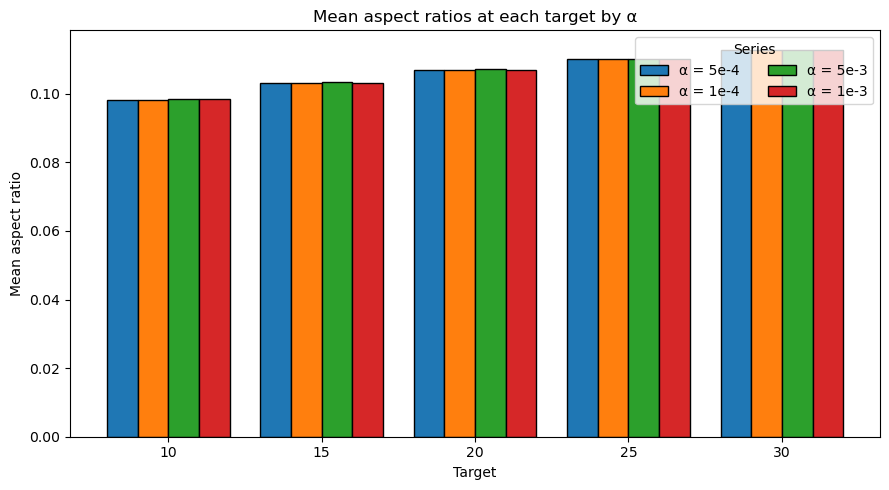

In [4]:

targets = np.array([10, 15, 20, 25, 30])
series = [
    (r'α = 5e-4', aspect_ratios_5e4),
    (r'α = 1e-4', aspect_ratios_1e4),
    (r'α = 5e-3', aspect_ratios_5e3),
    (r'α = 1e-3', aspect_ratios_1e3),
]

x = np.arange(len(targets))
n = len(series)
width = 0.8 / n  # total bar pack width ~0.8

plt.figure(figsize=(9,5))
for i, (label, vals) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, vals, width=width, edgecolor='k', label=label)

plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Mean aspect ratio')
plt.title('Mean aspect ratios at each target by α')
plt.legend(title='Series', ncol=2)
plt.tight_layout()
plt.show()


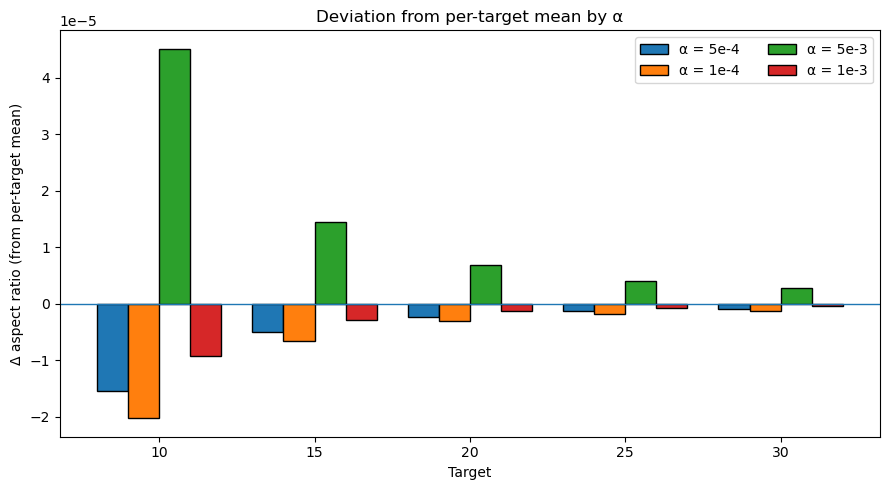

In [5]:
arr = np.vstack([s[1] for s in series])          # shape (4, 5)
grand_mean = arr.mean(axis=0, keepdims=True)     # per-target mean across α
deltas = arr - grand_mean                        # deviations

plt.figure(figsize=(9,5))
for i, (label, _) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, deltas[i], width=width, edgecolor='k', label=label)
plt.axhline(0, linewidth=1)
plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Δ aspect ratio (from per-target mean)')
plt.title('Deviation from per-target mean by α')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


In [6]:
aspect_ratio_5e4 = aspect_ratios_5e4[0]
aspect_ratio_1e4 = aspect_ratios_1e4[0]
aspect_ratio_5e3 = aspect_ratios_5e3[0]
aspect_ratio_1e3 = aspect_ratios_1e3[0]

print(aspect_ratio_5e4)
print(aspect_ratio_1e4)
print(aspect_ratio_5e3)
print(aspect_ratio_1e3)

0.09831616565112951
0.0983113322886335
0.09837673192155198
0.09832232359412532


Aspect Ratio:

$\frac{H}{r}$

Equation for Reynolds Number:

$\mathfrak{R}$ = $\alpha_\nu^{-1}*(\frac{r}{H})^{2}$


In [7]:
Reynolds_5e4 = (aspect_ratio_5e4**(-2)) / (5*10**(-4))
Reynolds_1e4 = (aspect_ratio_1e4**(-2)) / (1*10**(-4))
Reynolds_5e3 = (aspect_ratio_5e3**(-2)) / (5*10**(-3))
Reynolds_1e3 = (aspect_ratio_1e3**(-2)) / (1*10**(-3))


In [8]:
print(Reynolds_5e4)
print(Reynolds_1e4)
print(Reynolds_5e3)
print(Reynolds_1e3)

206909.35666626558
1034648.5104145535
20665.46649279972
103441.71997253466


In [9]:
df = pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Disc_Truncation\\Databases\\C1.csv", header=[0,1,2])

In [10]:
display(df['Circumsecondary']['0.3'])

,R,b,c
0,10000.0,-0.79,0.97
1,100000.0,-0.82,0.81
2,1000000.0,-0.83,0.69


In [11]:
display(df['Circumprimary'])

0.1                    0.2                    0.3              \
           R     b     c          R     b     c          R     b     c   
0    10000.0 -0.66  0.84    10000.0 -0.72  0.88    10000.0 -0.76  0.92   
1   100000.0 -0.75  0.68   100000.0 -0.78  0.72   100000.0 -0.80  0.75   
2  1000000.0 -0.78  0.56  1000000.0 -0.80  0.60  1000000.0 -0.81  0.63   

         0.4                    0.5              
           R     b     c          R     b     c  
0    10000.0 -0.77  0.95    10000.0 -0.78  0.94  
1   100000.0 -0.81  0.78   100000.0 -0.81  0.78  
2  1000000.0 -0.82  0.66  1000000.0 -0.82  0.66

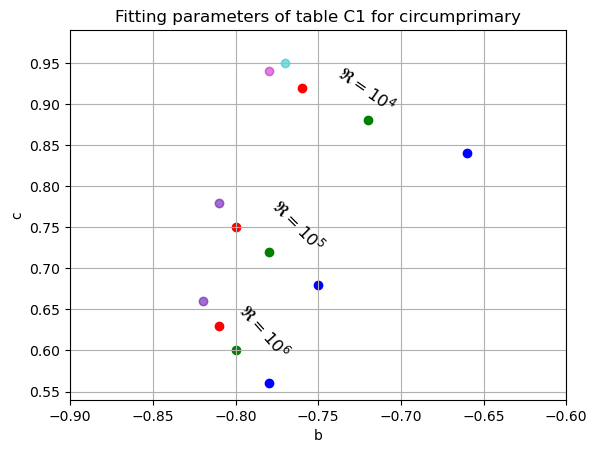

In [12]:
plt.scatter(df['Circumprimary']['0.1']['b'], df['Circumprimary']['0.1']['c'], color='b', label=r'$\mu = 0.1$')
plt.scatter(df['Circumprimary']['0.2']['b'], df['Circumprimary']['0.2']['c'], color='g', label=r'$\mu = 0.2$')
plt.scatter(df['Circumprimary']['0.3']['b'], df['Circumprimary']['0.3']['c'], color='r', label=r'$\mu = 0.3$')
plt.scatter(df['Circumprimary']['0.4']['b'], df['Circumprimary']['0.4']['c'], color='c', alpha=.5, label=r'$\mu = 0.4$')
plt.scatter(df['Circumprimary']['0.5']['b'], df['Circumprimary']['0.5']['c'], color='m', alpha=.5, label=r'$\mu = 0.5$')

plt.xlim(-.9,-.6)
plt.ylim(.54, .99)

plt.text(-0.80, 0.59, r"$\mathfrak{R} = 10^{6}$", rotation=-48, fontsize=12, color="k")
plt.text(-0.78, 0.72, r"$\mathfrak{R} = 10^{5}$", rotation=-45, fontsize=12, color="k")
plt.text(-0.74, 0.89, r"$\mathfrak{R} = 10^{4}$", rotation=-35, fontsize=12, color="k")


plt.xlabel('b')
plt.ylabel('c')
plt.title('Fitting parameters of table C1 for circumprimary')
plt.tight_layout
plt.grid()
plt.show()

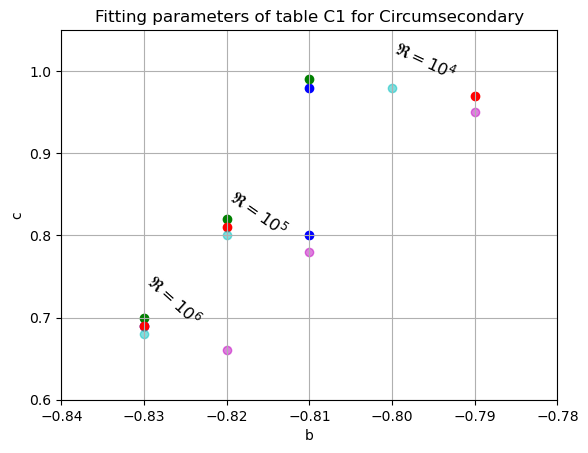

In [13]:
plt.scatter(df['Circumsecondary']['0.1']['b'], df['Circumsecondary']['0.1']['c'], color='b', label=r'$\mu = 0.1$')
plt.scatter(df['Circumsecondary']['0.2']['b'], df['Circumsecondary']['0.2']['c'], color='g', label=r'$\mu = 0.2$')
plt.scatter(df['Circumsecondary']['0.3']['b'], df['Circumsecondary']['0.3']['c'], color='r', label=r'$\mu = 0.3$')
plt.scatter(df['Circumsecondary']['0.4']['b'], df['Circumsecondary']['0.4']['c'], color='c', alpha=.5, label=r'$\mu = 0.4$')
plt.scatter(df['Circumsecondary']['0.5']['b'], df['Circumsecondary']['0.5']['c'], color='m', alpha=.5, label=r'$\mu = 0.5$')

plt.xlim(-.84,-.78)
plt.ylim(.6, 1.05)

plt.text(-0.83, 0.69, r"$\mathfrak{R} = 10^{6}$", rotation=-42, fontsize=12, color="k")
plt.text(-0.82, 0.8, r"$\mathfrak{R} = 10^{5}$", rotation=-35, fontsize=12, color="k")
plt.text(-0.80, .99, r"$\mathfrak{R} = 10^{4}$", rotation=-25, fontsize=12, color="k")


plt.xlabel('b')
plt.ylabel('c')
plt.title('Fitting parameters of table C1 for Circumsecondary')
plt.tight_layout
plt.grid()
plt.show()

define your function "truncation_radius" which 
gets in input M1, M2, abin, ebin, alpha 
    
    calculate R eggleton (DONE)
    
    calculates the Re given H/r found before (DONE)
    
    Fits b and c as a function of Re (table c1) for the 5 values of mu (i.e. 5 different fits) (Done)
    
    interpolates at the given Re, so you get 5 values of b and five values of c (which differ in mu:0.1,0.2,0.3,0.4,0.5 as in the table) (Done)
    
    fits these values of b and c to get the dependance on mu 
    
    interpolate such fits at the given mu=M2/M1+M2 so you get one value of b and one value of c
    
    finally, you use formula 3 with the b and c found + the other binary parameters 

In [14]:

alpha = [5e-4, 1e-4, 5e-3, 1e-3]
aspect_ratio = [aspect_ratio_5e4, aspect_ratio_1e4, aspect_ratio_5e3, aspect_ratio_1e3]


Re = AC.Reynolds(alpha, aspect_ratio)

print(Re)


mu = ['0.1', '0.2', '0.3', '0.4', '0.5']

b = []
c = []
R = df['Circumprimary']['0.1']['R']
for ii in range(len(mu)):
    bs = df['Circumprimary'][mu[ii]]['b']
    cs = df['Circumprimary'][mu[ii]]['c']
    b.append(bs)
    c.append(cs)
    


index = [0, 1, 2, 3, 4]
points = AC.make_pts(b, c, index[0])

print("matrix of points is: " + str(points))
print('')
print("row of points is: " + str(points[0]))
print('')
print("b is: " + str(points[0][0]))



[np.float64(206909.35666626558), np.float64(1034648.5104145535), np.float64(20665.46649279972), np.float64(103441.71997253466)]
matrix of points is: [[-6.6e-01  8.4e-01  1.0e+04]
 [-7.5e-01  6.8e-01  1.0e+05]
 [-7.8e-01  5.6e-01  1.0e+06]]

row of points is: [-6.6e-01  8.4e-01  1.0e+04]

b is: -0.66


$Re = a*e^{d*b}$

Where Re is the Reynolds number, and b is the parameter were fitting for

$Re = a*e^{d*c}$

Where Re is the Reynolds number, and c is the parameter were fitting for

In [78]:



def fit_for_b_and_c(b, c, mu_indices, plotting=False, xscale_log=True):
    mu = ['0.1', '0.2', '0.3', '0.4', '0.5']

    # --- Build raw data (now we’ll want R itself later) ---
    points  = AC.make_pts(b, c, mu_indices)        # [(b_i, c_i, Re_i), ...] length >= 3
    b_data  = np.array([points[i][0] for i in range(3)])
    c_data  = np.array([points[i][1] for i in range(3)])
    R_data  = np.array([points[i][2] for i in range(3)], dtype=float)  # Re
    x_data  = np.log(R_data)  # ln(Re)

    coeffs_b= np.polyfit(x_data, b_data, 2)
    print("Poly Fit Coefficients:", coeffs_b)
    # PBR = np.sqrt(np.diag(cov_b))

    coeffs_c= np.polyfit(x_data, c_data, 2)
    print("Poly Fit Coefficients:", coeffs_c)
    # PCR = np.sqrt(np.diag(cov_c))

    # Create polynomial function
    p_b = np.poly1d(coeffs_b)
    p_c = np.poly1d(coeffs_c)
    
    if plotting:
        # ---- Plot b vs Re (Re on x, b on y) ----
        plt.figure(figsize=(8, 5))
        plt.scatter(x_data, b_data, color='red', label='Data')
        x = np.linspace(np.min(x_data), np.max(x_data), 100)
        plt.plot(x, p_b(x),'b--', lw=2, label='Model from ln-fit')
        # plt.fill_between(R_fit, b_model - b_sigma, b_model + b_sigma, alpha=0.2, label='1σ band')
        if xscale_log:
            plt.xscale('log')
        plt.xlabel('Re')
        plt.ylabel('b')
        ttl = r'$\mathbf{b}$ vs $\mathrm{Re}$ (inverted from $\ln\mathrm{Re}=a\,e^{d\,b}$)' + f' for μ = {mu[mu_indices]}'
        plt.title(ttl)
        
        plt.figure(figsize=(8, 5))
        plt.scatter(x_data, c_data, color='red', label='Data')
        x = np.linspace(np.min(x_data), np.max(x_data), 100)
        plt.plot(x, p_c(x),'b--', lw=2, label='Model from ln-fit')
        # plt.fill_between(R_fit, b_model - b_sigma, b_model + b_sigma, alpha=0.2, label='1σ band')
        if xscale_log:
            plt.xscale('log')
        plt.xlabel('Re')
        plt.ylabel('b')
        ttl = r'$\mathbf{c}$ vs $\mathrm{Re}$ (inverted from $\ln\mathrm{Re}=a\,e^{d\,b}$)' + f' for μ = {mu[mu_indices]}'
        plt.title(ttl)
        

        plt.legend(); plt.tight_layout(); plt.show()


    return {
        "param_b": coeffs_b, "b fit": p_b,
        "param_c": coeffs_c, "c fit": p_c
    }
    
    
    
def find_and_plot_new_bc_points(b, c, mu_indices, R_targets, use_log_input=False, plotting=False, xscale_log=True):
    mu = ['0.1', '0.2', '0.3', '0.4', '0.5']
    points  = AC.make_pts(b, c, mu_indices)        # [(b_i, c_i, Re_i), ...] length >= 3
    b_data  = np.array([points[i][0] for i in range(3)])
    c_data  = np.array([points[i][1] for i in range(3)])
    R_data  = np.array([points[i][2] for i in range(3)], dtype=float)  # Re
    x_data  = np.log(R_data)  # ln(Re)

    # get polynomial fits from previous function
    fit_out = fit_for_b_and_c(b, c, mu_indices, plotting=False, xscale_log=xscale_log)
    p_b = fit_out["b fit"]
    p_c = fit_out["c fit"]

    # normalize targets
    if np.isscalar(R_targets):
        R_targets = [R_targets]
    R_targets = np.asarray(R_targets, dtype=float)
    x_targets = R_targets if use_log_input else np.log(R_targets)  # x = ln(Re)

    # compute new points from the polynomial fits
    new_b = p_b(x_targets)
    new_c = p_c(x_targets)

    # (Optional) estimate uncertainties — since polyfit doesn’t provide covariances directly,
    # you can leave them as zeros or compute them later via np.polyfit(cov=True)
    new_b_sigma = np.zeros_like(new_b)
    new_c_sigma = np.zeros_like(new_c)

    if plotting:
        min_val = np.min([np.min(x_data), np.min(x_targets)])
        max_val = np.max([np.max(x_data), np.max(x_targets)])
        plt.figure(figsize=(8,5))
        plt.scatter(x_targets, new_b, color='orange', label='New b* (polyfit)', zorder=3, alpha=.5)
        plt.scatter(x_data, b_data, color='blue', label='Known data', zorder=3, alpha=.5)
        plt.plot(np.linspace(min_val, max_val, 200),
                 p_b(np.linspace(min_val, max_val, 200)),
                 'b--', label='b fit')
        plt.xlabel(r'$\ln(\mathrm{Re})$' if not xscale_log else 'Re')
        plt.ylabel('b')
        plt.title(r'$\mathbf{b}$ vs $\ln(\mathrm{Re})$ using polynomial fit' + f' for μ = {mu[mu_indices]}')
        plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

        plt.figure(figsize=(8,5))
        plt.scatter(x_targets, new_c, color='orange', label='New c* (polyfit)', zorder=3, alpha=.5)
        plt.scatter(x_data, c_data, color='blue', label='Known data', zorder=3, alpha=.5)
        plt.plot(np.linspace(min_val, max_val, 200),
                 p_c(np.linspace(min_val, max_val, 200)),
                 'b--', label='c fit')
        plt.xlabel(r'$\ln(\mathrm{Re})$' if not xscale_log else 'Re')
        plt.ylabel('c')
        plt.title(r'$\mathbf{c}$ vs $\ln(\mathrm{Re})$ using polynomial fit' + f' for μ = {mu[mu_indices]}')
        plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

    return {
        "new_b": new_b, "new_b_sigma": new_b_sigma,
        "new_c": new_c, "new_c_sigma": new_c_sigma,
        "p_b": p_b, "p_c": p_c
    }


    
def show_me_new_points(b, c, mu_indices, Re):
    
    mu = ['0.1', '0.2', '0.3', '0.4', '0.5']
    
    fits = find_and_plot_new_bc_points(b, c, mu_indices, Re, plotting=False)
    newb = []
    newc = []
    for ii in range(4):
        b_s = f"Interpolated values of b for μ = {mu[mu_indices]} are b = {fits['new_b'][ii]:.4f} ± {fits['new_b_sigma'][ii]:.4f} for Re = {Re[ii]}"
        c_s = f"Interpolated values of c for μ = {mu[mu_indices]} are c = {fits['new_c'][ii]:.4f} ± {fits['new_c_sigma'][ii]:.4f} for Re = {Re[ii]}"
        newb.append(b_s)
        newc.append(c_s)
    # print(newb)
    # print(newc)
    return newb, newc

Poly Fit Coefficients: [ 0.00565835 -0.15634601  0.3       ]
Poly Fit Coefficients: [ 0.00377223 -0.14766012  1.88      ]


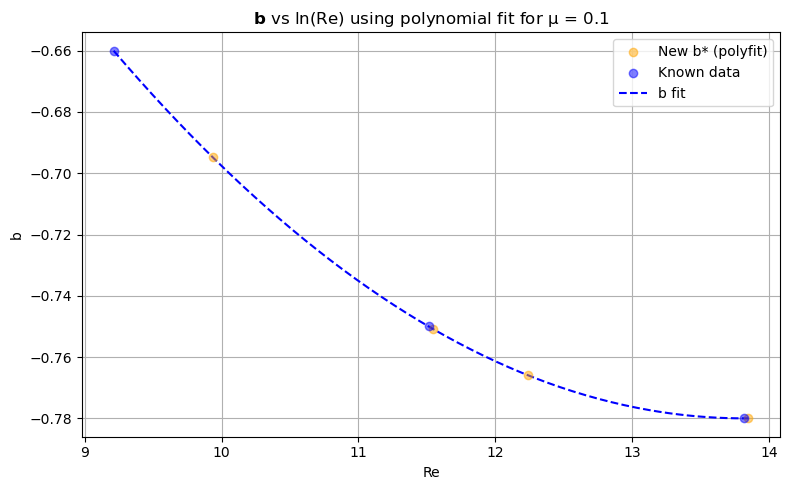

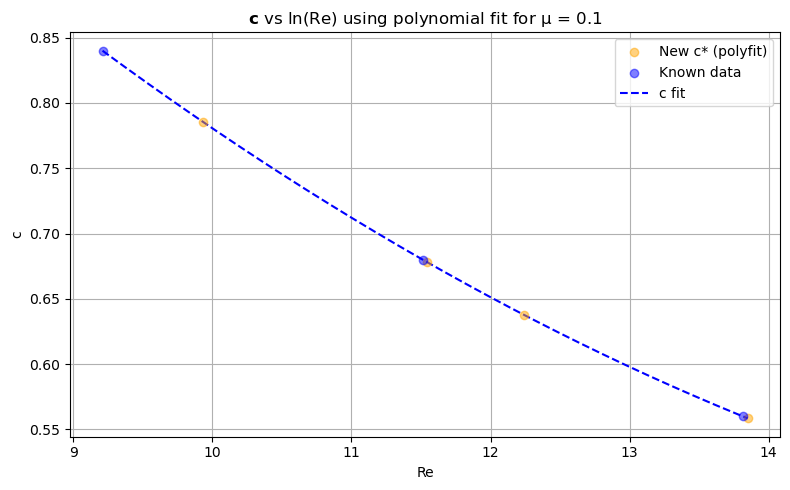

Poly Fit Coefficients: [ 0.00565835 -0.15634601  0.3       ]
Poly Fit Coefficients: [ 0.00377223 -0.14766012  1.88      ]
['Interpolated values of b for μ = 0.1 are b = -0.7660 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.1 are b = -0.7800 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.1 are b = -0.6948 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.1 are b = -0.7509 ± 0.0000 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.1 are c = 0.6378 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.1 are c = 0.5585 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.1 are c = 0.7852 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.1 are c = 0.6779 ± 0.0000 for Re = 103441.71997253466']
Poly Fit Coefficients: [ 0.00377223 -0.10423068 -0.08      ]
Poly Fit Coefficients: [ 0.00377223 -0.14766012  1.92      ]


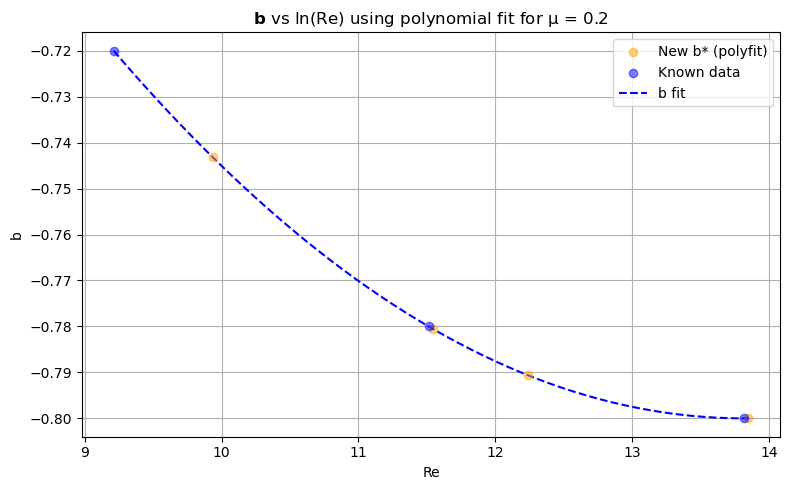

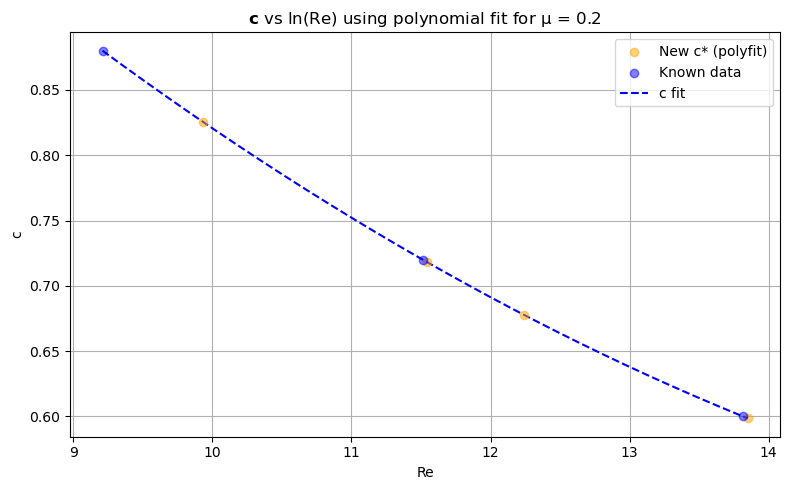

Poly Fit Coefficients: [ 0.00377223 -0.10423068 -0.08      ]
Poly Fit Coefficients: [ 0.00377223 -0.14766012  1.92      ]
['Interpolated values of b for μ = 0.2 are b = -0.7906 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.2 are b = -0.8000 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.2 are b = -0.7432 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.2 are b = -0.7806 ± 0.0000 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.2 are c = 0.6778 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.2 are c = 0.5985 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.2 are c = 0.8252 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.2 are c = 0.7179 ± 0.0000 for Re = 103441.71997253466']
Poly Fit Coefficients: [ 0.00282918 -0.07600153 -0.3       ]
Poly Fit Coefficients: [ 0.00471529 -0.17154632  2.1       ]


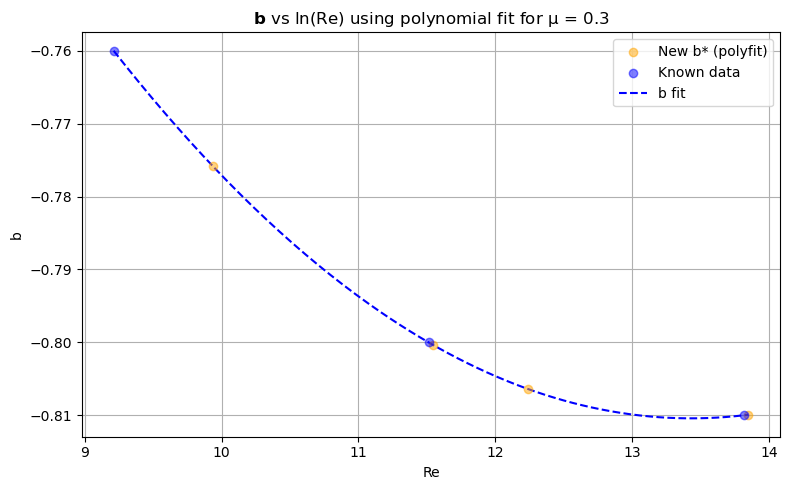

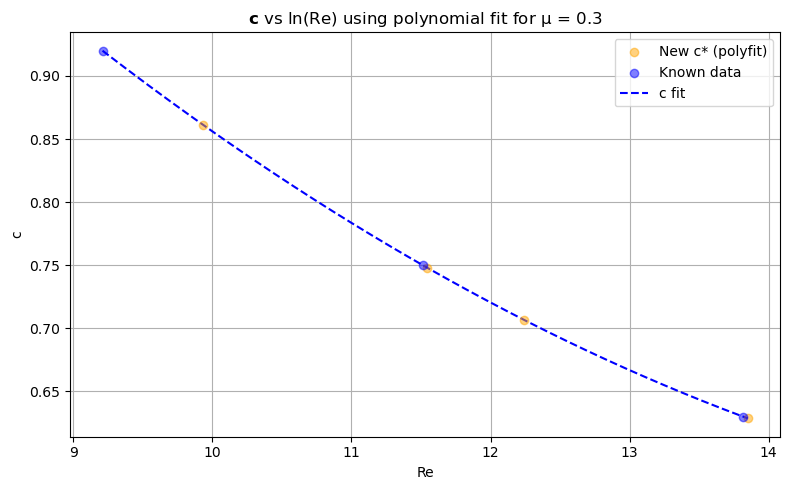

Poly Fit Coefficients: [ 0.00282918 -0.07600153 -0.3       ]
Poly Fit Coefficients: [ 0.00471529 -0.17154632  2.1       ]
['Interpolated values of b for μ = 0.3 are b = -0.8064 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.3 are b = -0.8099 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.3 are b = -0.7758 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.3 are b = -0.8004 ± 0.0000 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.3 are c = 0.7067 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.3 are c = 0.6286 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.3 are c = 0.8610 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.3 are c = 0.7479 ± 0.0000 for Re = 103441.71997253466']
Poly Fit Coefficients: [ 0.00282918 -0.07600153 -0.31      ]
Poly Fit Coefficients: [ 0.00471529 -0.17154632  2.13      ]


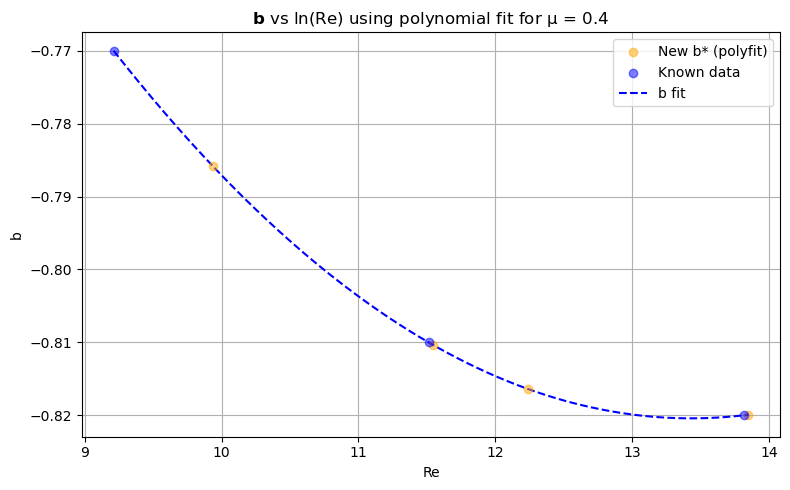

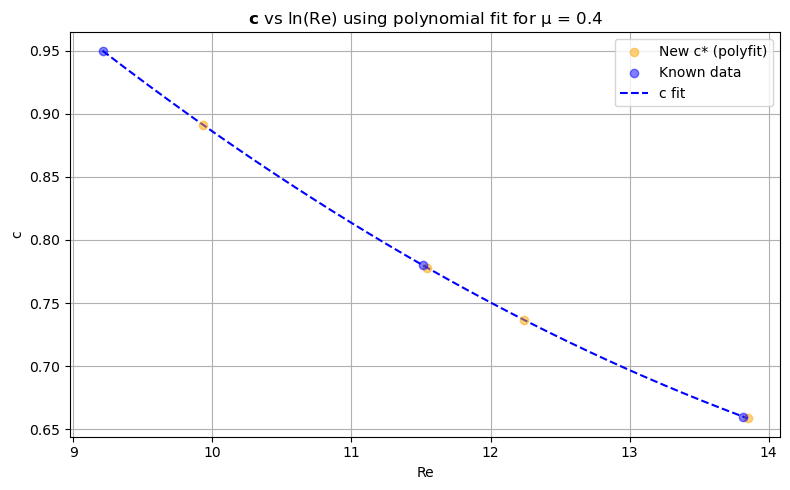

Poly Fit Coefficients: [ 0.00282918 -0.07600153 -0.31      ]
Poly Fit Coefficients: [ 0.00471529 -0.17154632  2.13      ]
['Interpolated values of b for μ = 0.4 are b = -0.8164 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.4 are b = -0.8199 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.4 are b = -0.7858 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.4 are b = -0.8104 ± 0.0000 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.4 are c = 0.7367 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.4 are c = 0.6586 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.4 are c = 0.8910 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.4 are c = 0.7779 ± 0.0000 for Re = 103441.71997253466']
Poly Fit Coefficients: [ 0.00188612 -0.05211534 -0.46      ]
Poly Fit Coefficients: [ 0.00377223 -0.14766012  1.98      ]


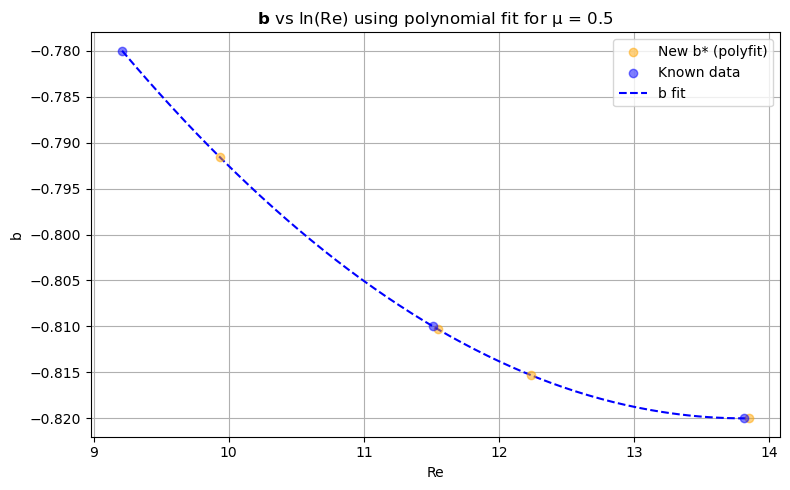

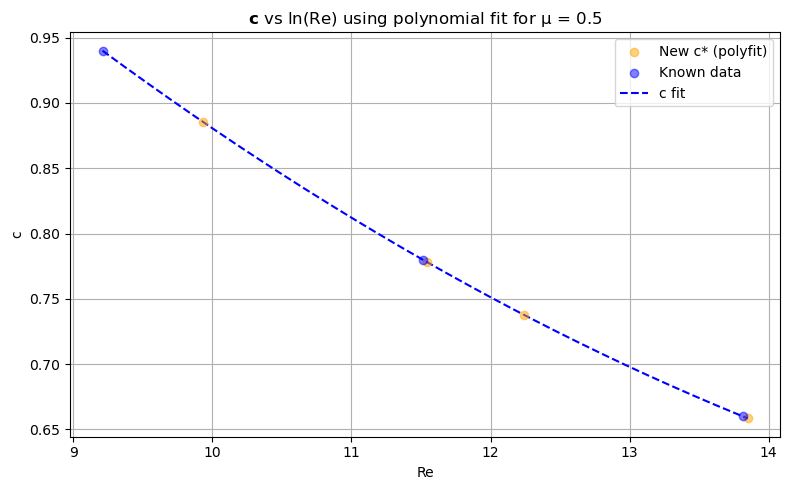

Poly Fit Coefficients: [ 0.00188612 -0.05211534 -0.46      ]
Poly Fit Coefficients: [ 0.00377223 -0.14766012  1.98      ]
['Interpolated values of b for μ = 0.5 are b = -0.8153 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.5 are b = -0.8200 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.5 are b = -0.7916 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.5 are b = -0.8103 ± 0.0000 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.5 are c = 0.7378 ± 0.0000 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.5 are c = 0.6585 ± 0.0000 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.5 are c = 0.8852 ± 0.0000 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.5 are c = 0.7779 ± 0.0000 for Re = 103441.71997253466']


In [79]:
find_and_plot_new_bc_points(b, c, index[0], Re, plotting=True)
newb1, newc1 = show_me_new_points(b, c, index[0],Re)
print(newb1)
print(newc1)


find_and_plot_new_bc_points(b, c, index[1], Re, plotting=True)
newb2, newc2 = show_me_new_points(b, c, index[1],Re)
print(newb2)
print(newc2)

find_and_plot_new_bc_points(b, c, index[2], Re, plotting=True)
newb3, newc3 = show_me_new_points(b, c, index[2],Re)
print(newb3)
print(newc3)


find_and_plot_new_bc_points(b, c, index[3], Re, plotting=True)
newb4, newc4 = show_me_new_points(b, c, index[3],Re)
print(newb4)
print(newc4)

find_and_plot_new_bc_points(b, c, index[4], Re, plotting=True)
newb5, newc5 = show_me_new_points(b, c, index[4],Re)
print(newb5)
print(newc5)

In [36]:
# x = np.array([points[ii][0] for ii in range(3)])
# print(x)
# y = np.array(np.log([points[ii][2] for ii in range(3)]))
# print(y)

# def test_exp(x, a, d):
#     return a * np.exp(d * x)

# # Fit model to data
# param, param_cov = curve_fit(test_exp, x, y)

# # Print optimized parameters and their covariance
# print("Exponential function coefficients:")
# print(param)
# print("Covariance of coefficients:")
# print(param_cov)

# # Generate fitted y values
# ans = param[0] * np.exp(param[1] * x)


# # Plot original data and fitted curve

# plt.plot(x, y, 'o', color='red', label='Noisy data')
# plt.plot(x, ans, '--', color='blue', label='Fitted curve')
# plt.xlabel('b')
# plt.ylabel('R')
# plt.title('Exponential Curve Fitting')
# plt.legend()



In [25]:
# find_and_plot_new_bc_points(b, c, index[1], Re, plotting=True)

def show_me_new_points(b, c, mu_indices, Re):
    fits = AC.find_and_plot_new_bc_points(b, c, mu_indices, Re, plotting=False)
    newb = []
    newc = []
    for ii in range(4):
        b_s = f"Interpolated values of b for μ = {mu[mu_indices]} are b = {fits['new_b'][ii]:.4f} ± {fits['new_b_sigma'][ii]:.4f} for Re = {Re[ii]}"
        c_s = f"Interpolated values of c for μ = {mu[mu_indices]} are c = {fits['new_c'][ii]:.4f} ± {fits['new_c_sigma'][ii]:.4f} for Re = {Re[ii]}"
        newb.append(b_s)
        newc.append(c_s)
    # print(newb)
    # print(newc)
    return newb, newc


for jj in range(len(mu)):
    newb, newc = AC.show_me_new_points(b, c, index[jj],Re)
    print(newb)
    print(newc)

['Interpolated values of b for μ = 0.1 are b = -0.7527 ± 0.0117 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.1 are b = -0.7900 ± 0.0164 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.1 are b = -0.6898 ± 0.0185 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.1 are b = -0.7351 ± 0.0119 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.1 are c = 0.6417 ± 0.0028 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.1 are c = 0.5568 ± 0.0037 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.1 are c = 0.7852 ± 0.0043 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.1 are c = 0.6818 ± 0.0028 for Re = 103441.71997253466']
['Interpolated values of b for μ = 0.2 are b = -0.7818 ± 0.0078 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.2 are b = -0.8067 ± 0.0109 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.2 are b = -0.7399 ± 0.0123 for Re = 2

$\mathbf{Re} = ae^{d*\mathbf{b}} \;\;\;\;\;\; (1)$


$\mathbf{Re} = ae^{d*\mathbf{c}} \;\;\;\;\;\; (2)$

Where Re is the Reynolds number, and b and c are the parameters were fitting for

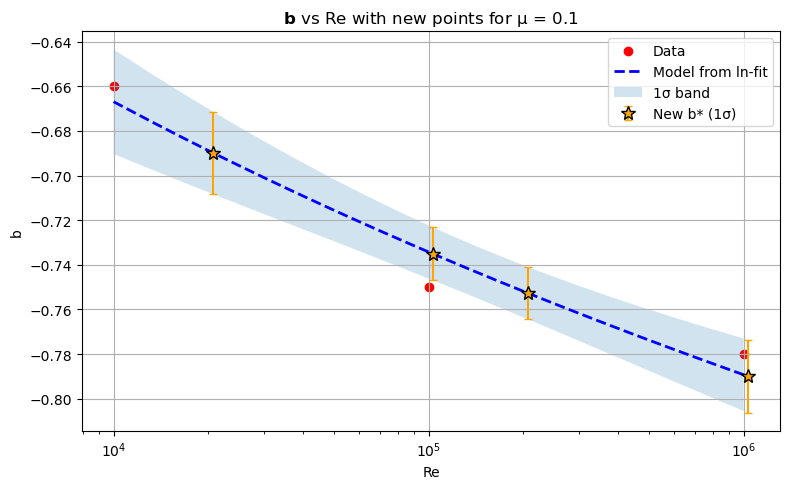

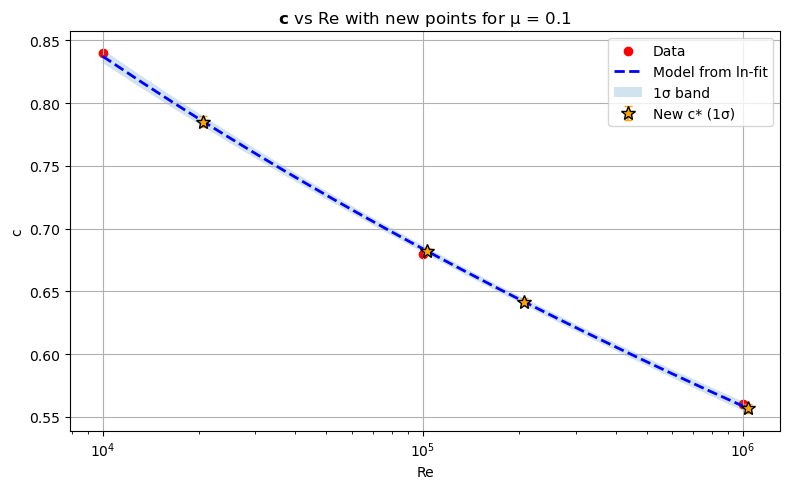

['Interpolated values of b for μ = 0.1 are b = -0.7527 ± 0.0117 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.1 are b = -0.7900 ± 0.0164 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.1 are b = -0.6898 ± 0.0185 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.1 are b = -0.7351 ± 0.0119 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.1 are c = 0.6417 ± 0.0028 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.1 are c = 0.5568 ± 0.0037 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.1 are c = 0.7852 ± 0.0043 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.1 are c = 0.6818 ± 0.0028 for Re = 103441.71997253466']


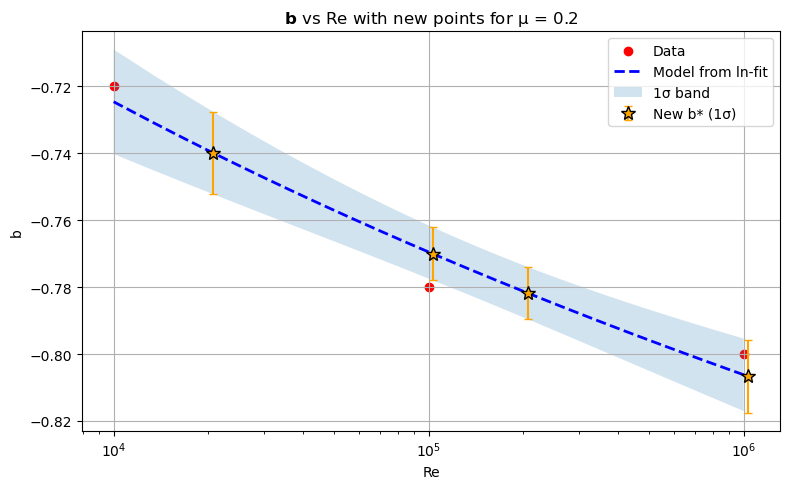

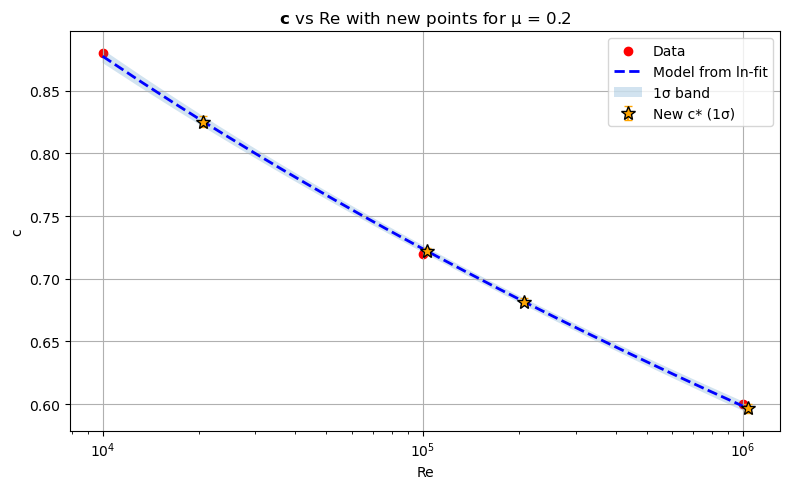

['Interpolated values of b for μ = 0.2 are b = -0.7818 ± 0.0078 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.2 are b = -0.8067 ± 0.0109 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.2 are b = -0.7399 ± 0.0123 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.2 are b = -0.7701 ± 0.0079 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.2 are c = 0.6817 ± 0.0028 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.2 are c = 0.5968 ± 0.0037 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.2 are c = 0.8252 ± 0.0043 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.2 are c = 0.7218 ± 0.0028 for Re = 103441.71997253466']


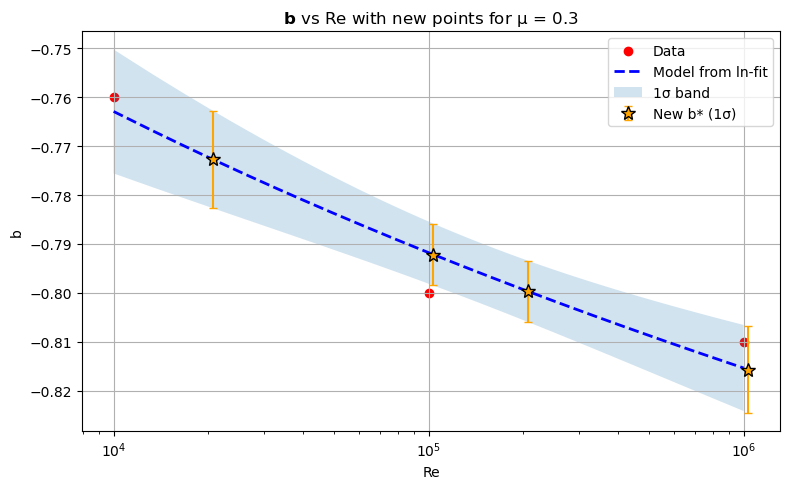

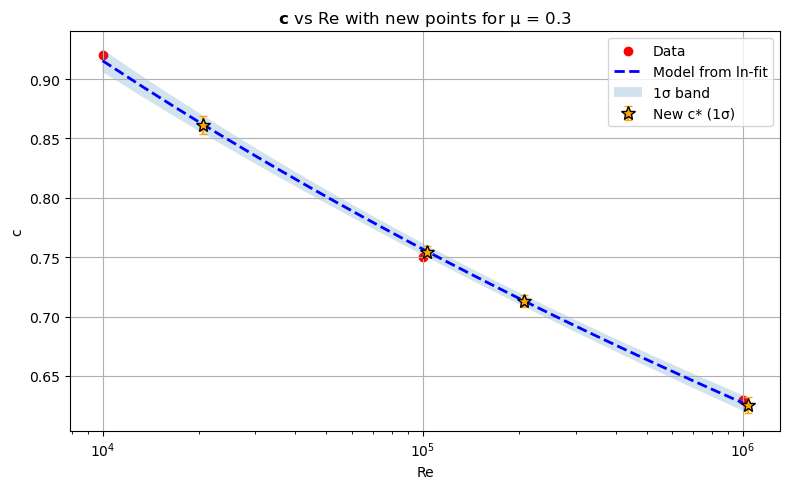

['Interpolated values of b for μ = 0.3 are b = -0.7997 ± 0.0063 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.3 are b = -0.8157 ± 0.0089 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.3 are b = -0.7727 ± 0.0100 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.3 are b = -0.7922 ± 0.0063 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.3 are c = 0.7133 ± 0.0049 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.3 are c = 0.6254 ± 0.0066 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.3 are c = 0.8615 ± 0.0075 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.3 are c = 0.7547 ± 0.0049 for Re = 103441.71997253466']


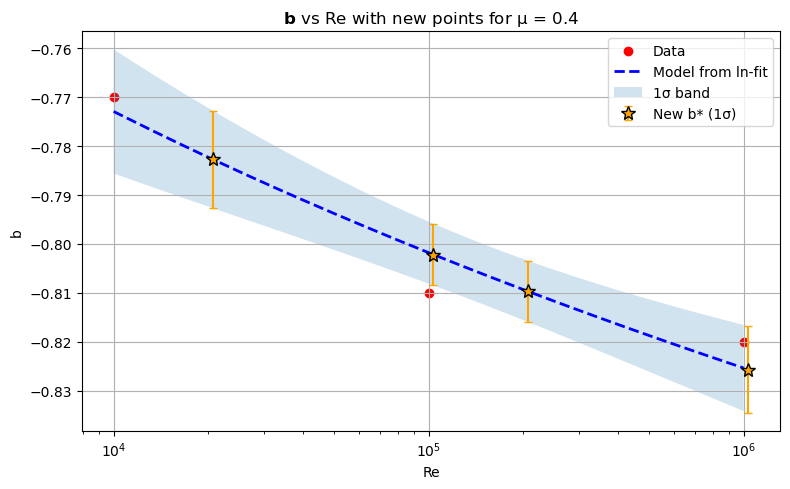

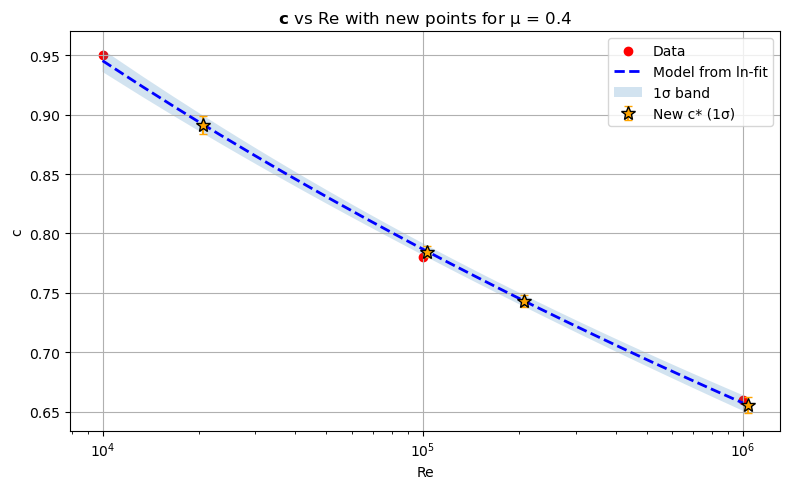

['Interpolated values of b for μ = 0.4 are b = -0.8097 ± 0.0063 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.4 are b = -0.8257 ± 0.0089 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.4 are b = -0.7827 ± 0.0100 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.4 are b = -0.8022 ± 0.0063 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.4 are c = 0.7433 ± 0.0049 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.4 are c = 0.6554 ± 0.0066 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.4 are c = 0.8915 ± 0.0075 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.4 are c = 0.7847 ± 0.0049 for Re = 103441.71997253466']


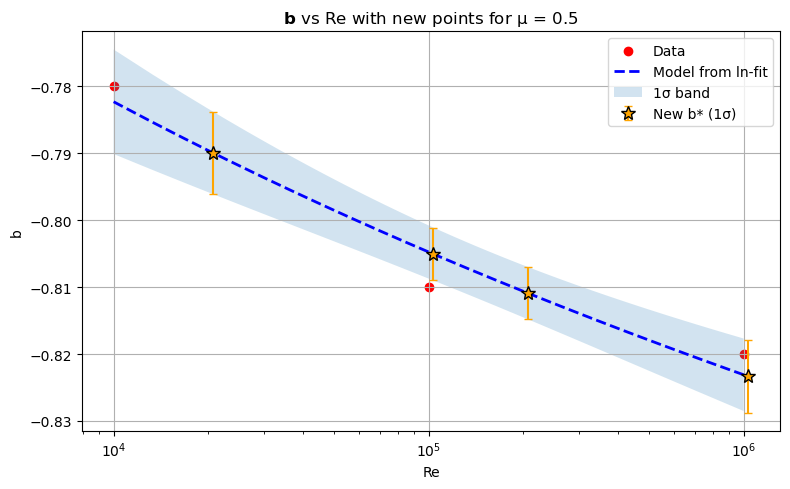

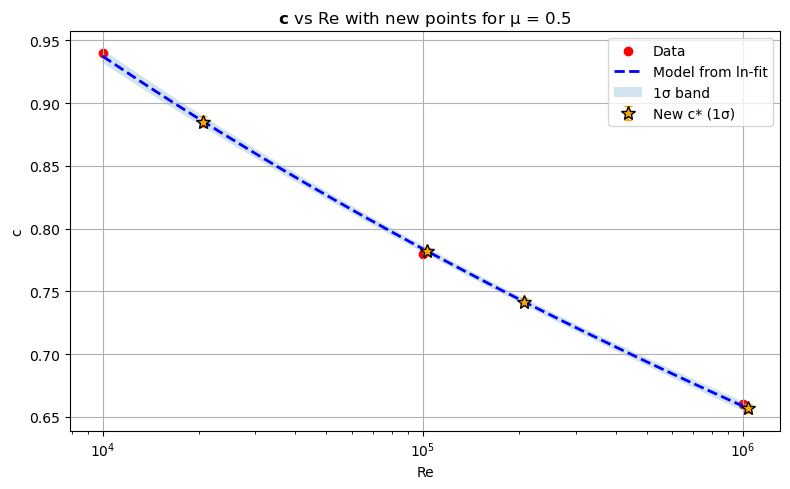

['Interpolated values of b for μ = 0.5 are b = -0.8109 ± 0.0039 for Re = 206909.35666626558', 'Interpolated values of b for μ = 0.5 are b = -0.8233 ± 0.0055 for Re = 1034648.5104145535', 'Interpolated values of b for μ = 0.5 are b = -0.7899 ± 0.0062 for Re = 20665.46649279972', 'Interpolated values of b for μ = 0.5 are b = -0.8050 ± 0.0040 for Re = 103441.71997253466']
['Interpolated values of c for μ = 0.5 are c = 0.7417 ± 0.0028 for Re = 206909.35666626558', 'Interpolated values of c for μ = 0.5 are c = 0.6568 ± 0.0037 for Re = 1034648.5104145535', 'Interpolated values of c for μ = 0.5 are c = 0.8852 ± 0.0043 for Re = 20665.46649279972', 'Interpolated values of c for μ = 0.5 are c = 0.7818 ± 0.0028 for Re = 103441.71997253466']


In [26]:
AC.find_and_plot_new_bc_points(b, c, index[0], Re, plotting=True)
newb1, newc1 = AC.show_me_new_points(b, c, index[0],Re)
print(newb1)
print(newc1)


AC.find_and_plot_new_bc_points(b, c, index[1], Re, plotting=True)
newb2, newc2 = AC.show_me_new_points(b, c, index[1],Re)
print(newb2)
print(newc2)

AC.find_and_plot_new_bc_points(b, c, index[2], Re, plotting=True)
newb3, newc3 = AC.show_me_new_points(b, c, index[2],Re)
print(newb3)
print(newc3)


AC.find_and_plot_new_bc_points(b, c, index[3], Re, plotting=True)
newb4, newc4 = AC.show_me_new_points(b, c, index[3],Re)
print(newb4)
print(newc4)

AC.find_and_plot_new_bc_points(b, c, index[4], Re, plotting=True)
newb5, newc5 = AC.show_me_new_points(b, c, index[4],Re)
print(newb5)
print(newc5)

$R_{trunc} (M1, M2, e, a) = R_{egg,i}*(b*e^{c} + 0.88*\mu^{0.01}) $

In [153]:
R_egg = AC.R_egg(2, 1, 1)

print(R_egg[0])

fits = find_and_plot_new_bc_points(b, c, index[0], Re, plotting=False)

def truncation_radius(M1, M2, e, abin):
    
    R_eggi = AC.R_egg(M1, M2, abin)
    trunc = R_eggi[0]*(fits['new_b'][0]*e**fits['new_c'][0] + 0.88*(M2/(M1+M2))**0.01)
    
    return trunc

truncation_radius(2,1,.2,1)

0.44000423753260814


np.float64(0.26506486920424244)

In [58]:


# # Example data (replace with yours)
# x = np.array(b[0])
# y = np.log(R)

# def test_exp(x, a, b):
#     return a * np.exp(b * x)

# # Fit model to data
# param, param_cov = curve_fit(test_exp, x, y)

# # Extract uncertainties of parameters
# perr = np.sqrt(np.diag(param_cov))  # 1σ errors
# print("Best-fit parameters:", param)
# print("Parameter uncertainties:", perr)

# # Generate fitted curve
# x_fit = np.linspace(min(x), max(x), 200)
# y_fit = test_exp(x_fit, *param)

# # --- Compute uncertainty in fitted curve ---
# # Error propagation: σ_y^2 = (∂y/∂a)^2 σ_a^2 + (∂y/∂b)^2 σ_b^2 + 2 (∂y/∂a)(∂y/∂b) cov(a,b)
# a, b_fit = param
# σ_a, σ_b = perr
# cov_ab = param_cov[0, 1]

# # Derivatives
# dy_da = np.exp(b_fit * x_fit)
# dy_db = a * x_fit * np.exp(b_fit * x_fit)

# # Propagate error
# σ_y = np.sqrt((dy_da * σ_a)**2 + (dy_db * σ_b)**2 + 2 * dy_da * dy_db * cov_ab)

# # Plot original data and fitted curve with error band
# plt.figure(figsize=(8,5))
# plt.errorbar(x, y, yerr=None, fmt='o', color='red', label='Data')  # you can add yerr if you have measurement errors
# plt.plot(x_fit, y_fit, '--', color='blue', label='Best-fit curve')
# plt.fill_between(x_fit, y_fit - σ_y, y_fit + σ_y, color='blue', alpha=0.2, label='1σ uncertainty')

# plt.xlabel('b')
# plt.ylabel('R')
# plt.title('Exponential Curve Fit with 1σ Error Band')
# plt.legend()
# plt.grid(True)
# plt.show()



In [138]:



# for ii in range(len(Re)):
#     plt.subplot(1, 2, 1)
#     plt.scatter(b[0], R, color='red', label='Known vals')
#     plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[0], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of b')
#     plt.ylabel('Reynolds Numbers')




#     plt.subplot(1, 2, 2)
#     plt.scatter(c[0], R, color='red', label='Known vals')
#     plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[1], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of c')
#     # plt.ylabel('Reynolds Numbers')


# plt.suptitle(f'Reynolds Number vs b and c for mu = {mu[0]}', y=0.98)
# # plt.suptitle(f'Red = Known Vals, Blue = Interp Vals', y=0.9)
# plt.tight_layout()



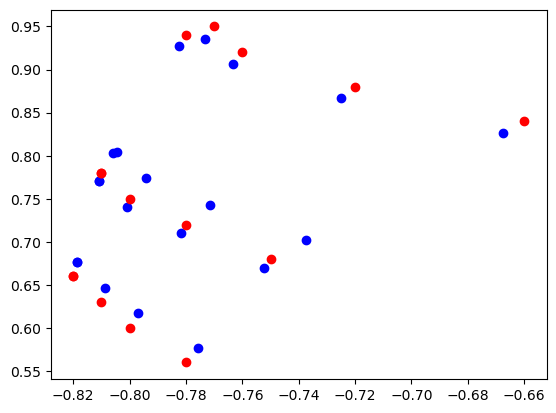

In [ ]:
# for jj in range(len(Re)):
#     for ii in range(len(index)):
#         plt.scatter(AC.linear_interp_pts(Re[jj], b, c, index[ii])[0], AC.linear_interp_pts(Re[jj], b, c, index[ii])[1], color='blue')
    
# plt.scatter(b, c, color='red')
# # plt.scatter(AC.linear_interp_pts(Re[0], b, c, index[0])[0], AC.linear_interp_pts(Re[0], b, c, index[0])[1], color='green')


In [140]:
# # new_R = list(reversed(R))
# plt.figure(figsize=(12, 6))

# for ii in range(len(Re)):
#     plt.subplot(1, 6, 1)
#     plt.scatter(b[0], R, color='red', label='Known vals')
#     plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[0])[0], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of b')
#     plt.ylabel('Reynolds Numbers')
#     plt.title('linear')




#     plt.subplot(1, 6, 2)
#     plt.scatter(c[0], R, color='red', label='Known vals')
#     plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[0])[1], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of c')
#     plt.title('linear')
#     # plt.ylabel('Reynolds Numbers')

# for ii in range(len(Re)):
#     plt.subplot(1, 6, 3)
#     plt.scatter(b[0], np.log(R), color='red', label='Known vals')
#     plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[0])[0], np.log(Re[ii]), color='blue', label='interped vals')
#     plt.xlabel('values of b')
#     plt.ylabel('Reynolds Numbers')
#     plt.title('log linear')




#     plt.subplot(1, 6, 4)
#     plt.scatter(c[0], np.log(R), color='red', label='Known vals')
#     plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[0])[1], np.log(Re[ii]), color='blue', label='interped vals')
#     plt.xlabel('values of c')
#     plt.title('log linear')
#     # plt.ylabel('Reynolds Numbers')




# for ii in range(len(Re)):
#     plt.subplot(1, 6, 5)
#     plt.scatter(b[0], R, color='red', label='Known vals')
#     plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[0], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of b')
#     plt.ylabel('Reynolds Numbers')
#     plt.title('quadratic')




#     plt.subplot(1, 6, 6)
#     plt.scatter(c[0], R, color='red', label='Known vals')
#     plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[1], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of c')
#     plt.title('quadratic')
#     # plt.ylabel('Reynolds Numbers')
    


# plt.suptitle(f'Reynolds Number vs b and c for mu = {mu[0]}', y=0.98)
# # plt.suptitle(f'Red = Known Vals, Blue = Interp Vals', y=0.9)
# plt.tight_layout()





# # plt.scatter(interp_pts(Re[0], index[0])[0], interp_pts(Re[0], index[0])[1])


In [141]:
# # new_R = list(reversed(R))


# for ii in range(len(Re)):
#     plt.subplot(1, 2, 1)
#     plt.scatter(b[1], R, color='red', label='Known vals')
#     plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[1])[0], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of b')
#     plt.ylabel('Reynolds Numbers')




#     plt.subplot(1, 2, 2)
#     plt.scatter(c[1], R, color='red', label='Known vals')
#     plt.scatter(AC.linear_interp_pts(Re[ii], b, c, index[1])[1], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of c')
#     # plt.ylabel('Reynolds Numbers')


# plt.suptitle(f'Reynolds Number vs b and c for mu = {mu[1]}', y=0.98)
# # plt.suptitle(f'Red = Known Vals, Blue = Interp Vals', y=0.9)
# plt.tight_layout()





# # plt.scatter(interp_pts(Re[0], index[0])[0], interp_pts(Re[0], index[0])[1])


In [142]:

"""

Original interpolation function
    
"""

# def Interps(pts, Re):
#     if Re[0] > pts[0][2] and Re[0] < pts[1][2]: # if the given reynolds number is between the first two points, then b and c are can be interpolated
#         t = (Re[0]-pts[0][2])/(pts[1][2]-pts[0][2])
#         b_new = (1-t)*pts[0][0]+t*pts[1][0] 
#         c_new = (1-t)*pts[0][1]+t*pts[1][1] 
        
#         return (b_new, c_new)
#     elif Re[0] > pts[1][2] and Re[0] < pts[2][2]:   # if the given reynolds number is between the second and third points, then b and c are can be interpolated
#         t = (Re[0]-pts[1][2])/(pts[2][2]-pts[1][2])
#         b_new = (1-t)*pts[1][0]+t*pts[2][0] 
#         c_new = (1-t)*pts[1][1]+t*pts[2][1] 
        
#         return (b_new, c_new)
#     elif Re[0] == pts[0][2]:    # if the given reynolds number equals the first pt, then b and c are known
#         b_new = pts[0][0]
#         c_new = pts[0][1]
#         return (b_new, c_new)
#     elif Re[0] == pts[1][2]:    # if the given reynolds number equals the second pt, then b and c are known
#         b_new = pts[1][0]
#         c_new = pts[1][1]
#         return (b_new, c_new)
#     elif Re[0] == pts[2][2]:    # if the given reynolds number equals the third pt, then b and c are known
#         b_new = pts[2][0]
#         c_new = pts[2][1]
#         return (b_new, c_new)
#     else:                       # if conditions above fail, return error
#         b_new = -27
#         c_new = -27
#         return (b_new, c_new)

# new_pts = Interps(pts, Re)
# print(new_pts)



'\n\nOriginal interpolation function\n\n'